<a href="https://colab.research.google.com/github/shivangi-jodbhavi/Neural-Networks/blob/master/AI_ANN_Churn_Rate_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN model to predict employee Churn 

# ->Loading the necessary librabries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-> Loading the dataset

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

#**EDA :**

#->peeking at the dataset

In [ ]:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



# ->Let's see how many rows and columns we got!

In [ ]:
df.shape

(10000, 14)

#->Let's see some facts here

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#->Let's get some statistics summary


In [ ]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#->check for missing values.

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#->Deleting irrelevant columns

In [ ]:
df.drop(axis=1, columns=['RowNumber','CustomerId','Surname','Geography'], inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1 = df

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [ ]:
df['Gender'].replace({'Female':1,'Male':0}, inplace=True)

In [ ]:
df.head(20)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
5,645,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,50,7,0.00,2,1,1,10062.80,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
tenure_notexited = df[df.Exited==0].Tenure

In [ ]:
tenure_exited = df[df.Exited==1].Tenure

#-> plotting histogram to check Tenure, Salary, Credit Score of people who exited

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.],
        [  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

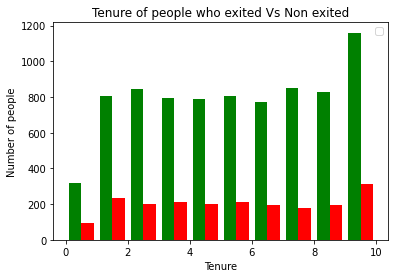

In [ ]:
plt.xlabel('Tenure')
plt.ylabel('Number of people')
plt.title('Tenure of people who exited Vs Non exited')
plt.legend()
plt.hist([tenure_notexited,tenure_exited], color=['green','red'], label=['Not Exited','Exited'])

In [ ]:
est_sal_exited = df[df.Exited==1].EstimatedSalary
est_sal_nt_exited =df[df.Exited==0].EstimatedSalary

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[789., 772., 815., 815., 806., 816., 811., 776., 784., 779.],
        [198., 196., 191., 212., 196., 211., 196., 206., 225., 206.]]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 2 Lists of Patches objects>)

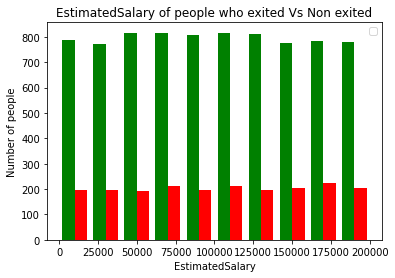

In [ ]:
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of people')
plt.title('EstimatedSalary of people who exited Vs Non exited')
plt.legend()
plt.hist([est_sal_nt_exited,est_sal_exited], color=['green','red'], label=['Not Exited','Exited'])


In [ ]:
cred_exited = df[df.Exited==1].CreditScore
cred_not_exited = df[df.Exited==0].CreditScore


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[   0.,  124.,  358.,  747., 1145., 1477., 1588., 1222.,  775.,
          527.],
        [  19.,   42.,   89.,  211.,  299.,  389.,  364.,  303.,  193.,
          128.]]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 2 Lists of Patches objects>)

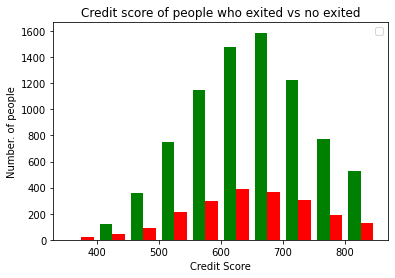

In [ ]:
plt.xlabel('Credit Score')
plt.ylabel('Number. of people')
plt.legend()
plt.title('Credit score of people who exited vs no exited')
plt.hist([cred_not_exited,cred_exited], color=['green','red'], label=['Not exited', 'Exited'])


**It can be seen that people with max tenure have stayed back**

#-> Seperating the target variable

In [ ]:
X = df.drop('Exited', axis = 'columns')
y = df.Exited


In [ ]:
X.shape

(10000, 9)

In [ ]:
y.shape

(10000,)

#-> Scaling the Data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
x = pd.DataFrame(scaled_features, index=df.index, columns=X.columns)

#-> Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=44)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7000, 9)
(3000, 9)
(7000,)
(3000,)


#->Building the ANN model

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu',input_shape=(9,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size= 32, epochs=50)


Epoch 1/50
219/219 [==============================] - 4s 3ms/step - loss: 0.6796 - accuracy: 0.6197
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5062 - accuracy: 0.7946
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4651 - accuracy: 0.7950
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7984
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.8019
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8060
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8079
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8117
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8174
Epoch 10/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8211

#->Evaluate the model

In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8527


[0.3571999967098236, 0.8526666760444641]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.10160929],
       [0.43636757],
       [0.5522869 ],
       [0.05595334],
       [0.0802487 ]], dtype=float32)

In [ ]:
y_test[:5]

3472    0
5095    0
9504    0
5786    0
8758    0
Name: Exited, dtype: int64

#->Rounding off predictions to 0 and 1

In [ ]:
y_pred =[]
for i in yp:
  if i >= 0.49:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
y_test[:10]

3472    0
5095    0
9504    0
5786    0
8758    0
7207    0
1562    1
3578    1
2546    1
6163    0
Name: Exited, dtype: int64

#-> Model works good to predict employee churn with train accuracy 85% and test accuracy of 85%

#-> Confusion  matrix 

Text(69.0, 0.5, 'Truth')

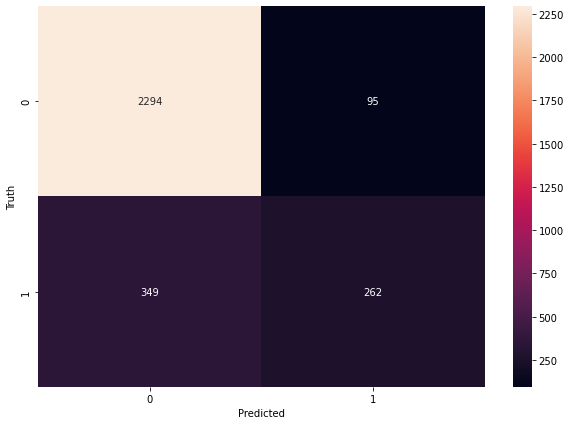

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")